링크 : https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EA%B2%A8%EC%9A%B8+%EC%BD%94%EB%94%94+%EC%B6%94%EC%B2%9C

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs

In [ ]:
#링크가져와서 요청 후 서버에게 응답받기
res = req.get("https://search.naver.com/search.naver?ssc=tab.blog.all&sm=tab_jum&query=%EA%B2%A8%EC%9A%B8+%EC%BD%94%EB%94%94+%EC%B6%94%EC%B2%9C")
res

<Response [200]>

In [ ]:
#html형식으로 파싱
soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="겨울 코디 추천 : 네이버 블로그검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'겨울 코디 추천'의 네이버 블로그검색 결과입니다." property="og:description"/> <meta content="'겨울 코디 추천'의 네이버 블로그검색 결과입니다." lang="ko" name="description"/> <title>겨울 코디 추천 : 네이버 블로그검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_251211.css" rel="stylesheet" type="te

In [ ]:

link_elements = soup.select("a.sds-comps-text-link")

# 가장 유력한 후보 선택자를 사용해 제목 요소를 추출합니다.
title_elements = soup.select("span.sds-comps-text-type-headline1")

if title_elements:
    # 제목 텍스트 추출 성공
    first_title_text = title_elements[0].text.strip()
    print(f"✅ 제목 추출 성공: {first_title_text}")

    # 추가 디버깅: 해당 제목이 몇 개나 추출되었는지 확인
    print(f"총 추출된 제목 요소 개수: {len(title_elements)}개")

else:
    print("❌ 경고: 해당 선택자로 제목을 찾지 못했습니다. 다른 선택자를 시도해야 합니다.")

✅ 제목 추출 성공: 살로몬 컨투어다운 자켓 남자 숏패딩 추천 고프코어 겨울 코디 아이템!
총 추출된 제목 요소 개수: 30개


In [ ]:
# 'sds-comps-vertical-layout'과 'sds-comps-full-layout'을 모두 가진 요소를 선택합니다.
container_selector = ".sds-comps-vertical-layout.sds-comps-full-layout"

# 예시 코드
blog_items = soup.select(container_selector)

if blog_items:
    print(f"✅ 추출된 블로그 항목 컨테이너 개수: {len(blog_items)}개")

    # 이 컨테이너 내에서 링크를 찾습니다.
    first_item = blog_items[0]

    # 컨테이너 내부에서 블로그 링크 (a 태그)를 필터링
    blog_links_in_item = []
    for link_tag in first_item.find_all('a'):
        href = link_tag.get('href', '')
        if "blog.naver.com" in href:
            blog_links_in_item.append(href)

    if blog_links_in_item:
        print(f"첫 번째 항목 내에서 찾은 링크: {blog_links_in_item[0]}")
    else:
        print("경고: 컨테이너는 찾았으나, 그 안에서 블로그 링크를 찾지 못했습니다.")

✅ 추출된 블로그 항목 컨테이너 개수: 167개
첫 번째 항목 내에서 찾은 링크: https://blog.naver.com/coolps8/224110633229


In [ ]:
import requests
from bs4 import BeautifulSoup
import time

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

query = "겨울코디추천"
url = (
    f"https://search.naver.com/search.naver"
    f"?ssc=tab.blog.all&query={query}&sm=tab_opt"
    f"&nso=so:dd,p:1w&start=1"
)

blog_links = []
res = requests.get(url, headers=headers)

if res.status_code == 200:
    soup = BeautifulSoup(res.text, "lxml")

    link_selectors = ["a.total_tit", "a.title_link", "div.blog_item a"]
    link_elements = []

    for selector in link_selectors:
        link_elements = soup.select(selector)
        if link_elements:
            print(f"✅ 성공: 선택자 '{selector}'로 링크 요소 {len(link_elements)}개 찾음.")
            break

    # 2. 찾은 요소에서 href 속성을 추출합니다.
    if link_elements:
        for element in link_elements:
            href = element.get('href', '')
            if href and "blog.naver.com" in href:
                 # 불필요한 링크 제외 (필요 시 더 추가)
                if not any(keyword in href for keyword in ['addneighbor', 'menusearch']):
                    blog_links.append(href)

    # 3. 모든 선택자 실패 시 (최후의 수단): 모든 <a> 태그를 필터링합니다.
    if not blog_links:
        print("❌ 경고: 특정 선택자로 링크 추출 실패. 모든 <a> 태그 필터링 시도.")

        for a in soup.find_all('a'):
            href = a.get('href', '')
            if "blog.naver.com" in href:
                if not any(keyword in href for keyword in ['addneighbor', 'menusearch']):
                    blog_links.append(href)

    # ----------------------------------------------------

    # 중복 제거
    blog_links = list(dict.fromkeys(blog_links))


print("\n" + "="*40)
print(f"✅ 첫 페이지에서 추출된 유니크 블로그 링크 수: {len(blog_links)}개")
print("="*40)

if blog_links:
    print("\n[전체 블로그 링크 목록]")
    for i, link in enumerate(blog_links, 1):
        print(f"{i}. {link}")

❌ 경고: 특정 선택자로 링크 추출 실패. 모든 <a> 태그 필터링 시도.

✅ 첫 페이지에서 추출된 유니크 블로그 링크 수: 59개

[전체 블로그 링크 목록]
1. https://blog.naver.com/ssuring2509
2. https://blog.naver.com/ssuring2509/224113846618
3. https://blog.naver.com/mrsjung83
4. https://blog.naver.com/mrsjung83/224113845795
5. https://blog.naver.com/angel_766
6. https://blog.naver.com/angel_766/224113843980
7. https://blog.naver.com/comejo
8. https://blog.naver.com/comejo/224113842767
9. https://blog.naver.com/madogirl
10. https://blog.naver.com/madogirl/224113841970
11. https://blog.naver.com/god930515
12. https://blog.naver.com/god930515/224113341714
13. https://blog.naver.com/ehmp44063
14. https://blog.naver.com/ehmp44063/224112063277
15. https://blog.naver.com/vbuxfgr5776625
16. https://blog.naver.com/vbuxfgr5776625/224104492579
17. https://blog.naver.com/bi5454
18. https://blog.naver.com/bi5454/224113837223
19. https://blog.naver.com/fzdk3214018
20. https://blog.naver.com/fzdk3214018/224101063158
21. https://blog.naver.com/sweetsconnetsss
2

In [ ]:
# 현재 blog_links 변수에는 53개의 링크가 들어 있습니다.

cleaned_blog_links = []
for link in blog_links:
    # URL 경로의 마지막 세그먼트가 숫자로 된 포스트 번호인 경우만 남깁니다.
    # 포스트 번호는 10자리 이상의 숫자로 이루어져 있습니다.
    path_segments = link.split('/')
    last_segment = path_segments[-1]

    if last_segment.isdigit() and len(last_segment) >= 10:
        cleaned_blog_links.append(link)

# 만약 URL이 'm.blog.naver.com/...' 형태로 바로 포스트 주소인 경우도 포함합니다.
# 이 필터링은 완벽하지 않을 수 있지만, 불필요한 메인 주소를 줄여줍니다.

print(f"✅ 분석 대상 포스트 링크 수 (클리닝 후): {len(cleaned_blog_links)}개")

✅ 분석 대상 포스트 링크 수 (클리닝 후): 30개


In [ ]:
print("\n[클리닝 후 블로그 포스트 링크 30개]")

for i, link in enumerate(cleaned_blog_links[:30], 1):
    print(f"{i}. {link}")



[클리닝 후 블로그 포스트 링크 30개]
1. https://blog.naver.com/ssuring2509/224113846618
2. https://blog.naver.com/mrsjung83/224113845795
3. https://blog.naver.com/angel_766/224113843980
4. https://blog.naver.com/comejo/224113842767
5. https://blog.naver.com/madogirl/224113841970
6. https://blog.naver.com/god930515/224113341714
7. https://blog.naver.com/ehmp44063/224112063277
8. https://blog.naver.com/vbuxfgr5776625/224104492579
9. https://blog.naver.com/bi5454/224113837223
10. https://blog.naver.com/fzdk3214018/224101063158
11. https://blog.naver.com/sweetsconnetsss/224113794662
12. https://blog.naver.com/path-of-blessing/224113835618
13. https://blog.naver.com/okcurious/224113835031
14. https://blog.naver.com/lhythis533/224113832688
15. https://blog.naver.com/thaulmtf06r/224113830609
16. https://blog.naver.com/jjy1442/224113829748
17. https://blog.naver.com/ueox1910/224101057067
18. https://blog.naver.com/eveworld/224113508200
19. https://blog.naver.com/iamchocolat/224113519274
20. https://blog.na

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from collections import Counter
import re # 텍스트 클리닝을 위한 정규식 모듈

# User-Agent 설정 (브라우저인 것처럼 보이게 함)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# ----------------------------------------------------
# ⭐ 분석을 위한 키워드 목록 정의 (이전 요청에 따라 추가)
# ----------------------------------------------------
ITEMS = [
    "코트", "패딩", "자켓", "점퍼", "블레이저", "가디건", "니트", "스웨터",
    "셔츠", "블라우스", "티셔츠", "후드티", "바지", "청바지", "슬랙스", "스커트",
    "치마", "원피스", "부츠", "로퍼", "운동화", "스니커즈", "가방", "백팩",
    "머플러", "목도리", "장갑", "모자", "비니",
    # ⭐ 새로 추가된 항목
    "조거팬츠", "바라클라바", "스웻셔츠", "레깅스", "후리스", "롱부츠", "숄더백"
]

COLORS = [
    "블랙", "화이트", "아이보리", "베이지", "그레이", "네이비", "브라운",
    "카키", "버건디", "레드", "핑크", "블루", "스카이블루", "옐로우", "오렌지",
    "민트", "퍼플",
    # ⭐ 새로 추가된 항목
    "크림", "오트밀", "라떼", "딥그린", "와인", "카멜", "톤온톤"
]

MATERIALS = [
    "울", "캐시미어", "가죽", "코튼", "면", "데님", "린넨", "실크", "나일론",
    "폴리에스터", "스웨이드", "니트", "퍼", "벨벳",
    "아크릴", "레이온", "스판덱스", "코듀로이", "플리스",
    "다운", "웰론", "양털", "무스탕"
]

# ----------------------------------------------------
# ⭐ 헬퍼 함수 정의
# ----------------------------------------------------

def clean_text(text):
    """HTML 태그, 이모지, 광고 문구 등을 제거하여 텍스트를 정제합니다."""
    # 괄호 안의 광고성 문구 제거 (예: (내돈내산), (협찬), (사진=블로그주인) 등)
    text = re.sub(r'\(.*?\)', '', text)
    # 줄바꿈 및 다중 공백 정리
    text = re.sub(r'[\n\r\t]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def extract_keywords(text, keyword_list):
    """정의된 키워드 목록에서 텍스트에 나타난 횟수를 카운트합니다."""
    counter = Counter()
    text_lower = text.lower()
    for keyword in keyword_list:
        # 텍스트에서 키워드가 포함된 횟수를 카운트
        count = text_lower.count(keyword.lower())
        if count > 0:
            counter[keyword] += count
    return counter


# ----------------------------------------------------
# ⭐ 본문 수집 메인 로직
# ----------------------------------------------------

contents = []
# blog_links 변수는 이전에 53개 링크가 추출된 리스트를 사용한다고 가정합니다.

print("--- 블로그 본문 수집 시작 ---")

for i, link in enumerate(blog_links, 1):
    # 1. PC 주소를 모바일 주소로 변환하여 시도 (모바일 주소가 더 구조가 단순할 수 있음)
    if "blog.naver.com" in link and not "m.blog.naver.com" in link:
        target_link = link.replace("blog.naver.com", "m.blog.naver.com")
    else:
        target_link = link

    res = requests.get(target_link, headers=headers)

    if res.status_code != 200:
        continue

    soup = BeautifulSoup(res.text, "lxml")

    # 2. ⭐⭐ 최종 보강된 본문 추출 셀렉터 목록 ⭐⭐
    selectors_to_try = [
        ".se-main-container",  # Smart Editor ONE (가장 흔함)
        ".post-view",         # PC 구형 에디터
        "div.post_ct",        # 모바일 블로그 본문 컨테이너 (고유 클래스)
        ".blog2_body",        # 모바일 환경 구형 블로그 본문
        "._post_content",     # 네이버 블로그 뷰어
        ".article_content"    # 또 다른 범용 컨텐츠 영역
    ]

    body_container = None

    for selector in selectors_to_try:
        body_container = soup.select_one(selector)
        if body_container:
            break

    text = ""
    if body_container:
        text = body_container.get_text("\n", strip=True)
    else:
        # 3. 최후의 수단: 텍스트가 긴 모든 p, div, span 태그를 모음 (실패 방지)
        texts = [tag.get_text("\n", strip=True) for tag in soup.find_all(['p', 'div', 'span']) if len(tag.get_text("\n", strip=True)) > 50]
        text = "\n".join(texts)

    if len(text) < 100: # 최소 100자 미만은 제외
        continue

    contents.append({
        "link": link,
        "text": text
    })

    time.sleep(0.5) # 서버 부하 줄이기 위해 딜레이 유지 (0.5초로 줄임)

print("\n--- 본문 수집 완료 ---")
print("최종 분석 대상 본문 수:", len(contents))

# ----------------------------------------------------
# ⭐ 키워드 카운팅 및 최종 결과 출력 로직
# ----------------------------------------------------

if len(contents) > 0:
    item_counter = Counter()
    color_counter = Counter()
    material_counter = Counter()

    for c in contents:
        raw_text = c["text"]

        # 텍스트 클리닝
        clean_text_result = clean_text(raw_text)

        # 키워드 카운팅
        item_counter.update(extract_keywords(clean_text_result, ITEMS))
        color_counter.update(extract_keywords(clean_text_result, COLORS))
        material_counter.update(extract_keywords(clean_text_result, MATERIALS))


    print("\n" + "="*40)
    print("           블로그 키워드 분석 결과")
    print("="*40)

    print("\n### 👕 가장 많이 언급된 아이템 (TOP 5)")
    for item, count in item_counter.most_common(5):
        print(f"- {item}: {count}회")

    print("\n### 🎨 가장 많이 언급된 컬러 (TOP 5)")
    for color, count in color_counter.most_common(5):
        print(f"- {color}: {count}회")

    print("\n### 🧶 가장 많이 언급된 소재 (TOP 5)")
    for material, count in material_counter.most_common(5):
        print(f"- {material}: {count}회")

else:
    print("\n⚠️ 경고: 본문 추출에 최종적으로 실패했습니다. 동적 크롤링 도구(Selenium)가 필요할 수 있습니다.")

--- 블로그 본문 수집 시작 ---

--- 본문 수집 완료 ---
최종 분석 대상 본문 수: 59

           블로그 키워드 분석 결과

### 👕 가장 많이 언급된 아이템 (TOP 5)
- 패딩: 59회
- 자켓: 55회
- 니트: 49회
- 코트: 46회
- 바지: 43회

### 🎨 가장 많이 언급된 컬러 (TOP 5)
- 블랙: 38회
- 베이지: 14회
- 그레이: 14회
- 크림: 14회
- 퍼플: 13회

### 🧶 가장 많이 언급된 소재 (TOP 5)
- 울: 238회
- 면: 207회
- 퍼: 65회
- 니트: 49회
- 플리스: 25회


C:\Users\smhrd\AppData\Local\Temp\ipykernel_23548\3948141156.py:65: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) Malgun Gothic.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\smhrd\AppData\Local\Temp\ipykernel_23548\3948141156.py:65: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Malgun Gothic.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\smhrd\AppData\Local\Temp\ipykernel_23548\3948141156.py:65: UserWarning: Glyph 129526 (\N{BALL OF YARN}) missing from font(s) Malgun Gothic.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\smhrd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128085 (\N{T-SHIRT}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\smhrd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\smhrd\anaconda3\Lib\si

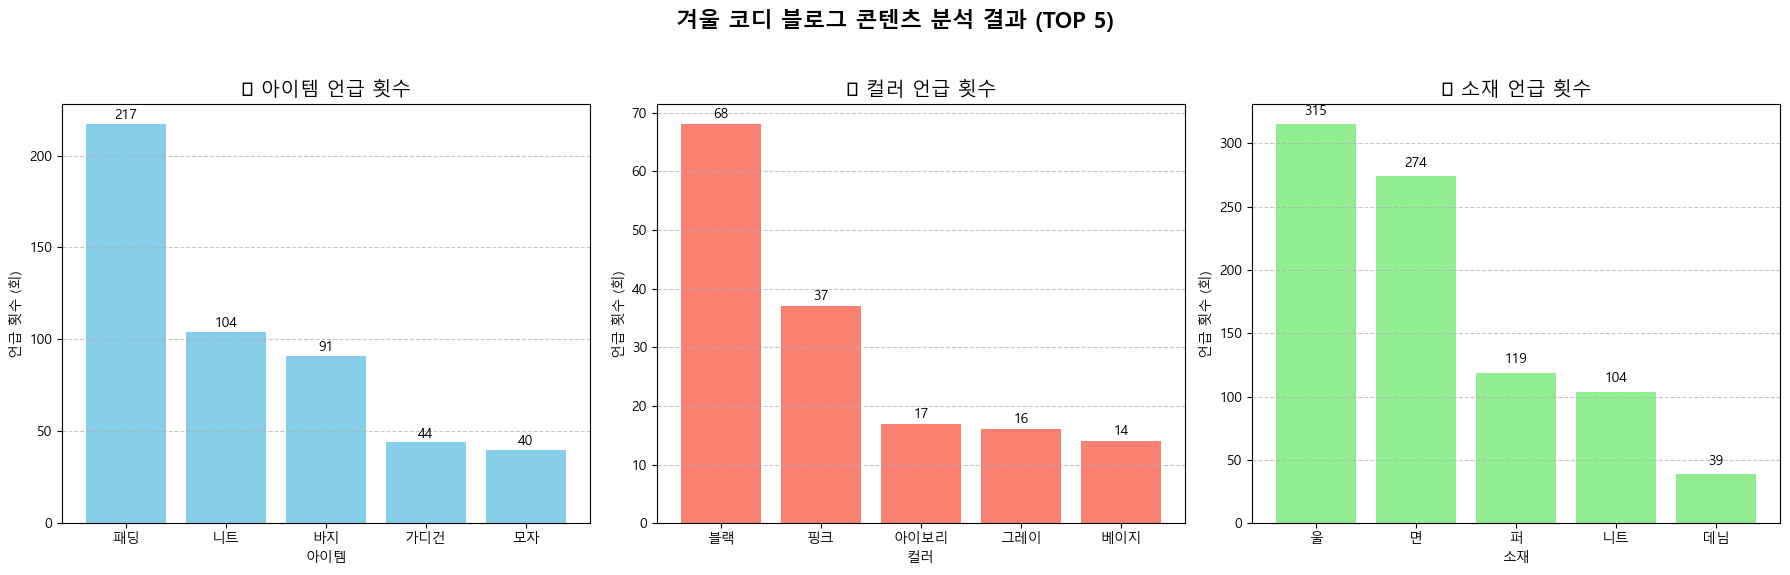

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# 1. 시각화 데이터 준비
item_data = item_counter.most_common(5)
color_data = color_counter.most_common(5)
material_data = material_counter.most_common(5)

df_items = pd.DataFrame(item_data, columns=['아이템', '횟수'])
df_colors = pd.DataFrame(color_data, columns=['컬러', '횟수'])
df_materials = pd.DataFrame(material_data, columns=['소재', '횟수'])

# ----------------------------------------------------
# 2. 그래프 설정 및 그리기
# ----------------------------------------------------

# 한글 폰트 설정 (Windows 환경을 기준으로 Malgun Gothic 설정)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 만약 여전히 이모지(\N{T-SHIRT})나 한글이 깨진다면, 사용자 환경에 맞는 폰트로 변경하세요.
# 예: Colab/Linux 환경: plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 3개의 서브플롯(sub-plots) 생성
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('겨울 코디 블로그 콘텐츠 분석 결과 (TOP 5)', fontsize=16, fontweight='bold')

# --- 첫 번째 그래프: 아이템 ---
ax1 = axes[0]
bars1 = ax1.bar(df_items['아이템'], df_items['횟수'], color='skyblue')
ax1.set_title('👕 아이템 언급 횟수', fontsize=14)
ax1.set_xlabel('아이템')
ax1.set_ylabel('언급 횟수 (회)')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom') # 수정 완료

# --- 두 번째 그래프: 컬러 ---
ax2 = axes[1]
bars2 = ax2.bar(df_colors['컬러'], df_colors['횟수'], color='salmon')
ax2.set_title('🎨 컬러 언급 횟수', fontsize=14)
ax2.set_xlabel('컬러')
ax2.set_ylabel('언급 횟수 (회)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom') # 수정 완료

# --- 세 번째 그래프: 소재 ---
ax3 = axes[2]
bars3 = ax3.bar(df_materials['소재'], df_materials['횟수'], color='lightgreen')
ax3.set_title('🧶 소재 언급 횟수', fontsize=14)
ax3.set_xlabel('소재')
ax3.set_ylabel('언급 횟수 (회)')
ax3.grid(axis='y', linestyle='--', alpha=0.7)
# 막대 위에 값 표시 (x, y, s 인자 모두 포함)
for bar in bars3:
    yval = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom') # 수정 완료

# 그래프 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
!pip install langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [ ]:
import re

def clean_for_rag(text):
    # 1. HTML 태그 제거 (BeautifulSoup을 사용하지 않았다면 re.sub로 <.*?> 등을 제거)
    text = re.sub('<[^>]*>', '', text)
    # 2. 광고/협찬 문구 제거 (예시)
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    # 3. URL 제거
    text = re.sub(r'http\S+|www\S+', '', text, flags=re.MULTILINE)
    # 4. 특수 문자 및 이모지 제거 (한글, 영문, 숫자, 마침표, 쉼표 외 제거)
    text = re.sub(r'[^\w\s.,가-힣]', '', text)
    # 5. 과도한 공백 및 줄바꿈 정리
    text = re.sub(r'[\r\n\t]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 예시 적용
# cleaned_text = clean_for_rag(raw_text)

In [ ]:
!pip install langchain-chroma langchain-google-genai pydantic beautifulsoup4 langchain

In [ ]:
# 텍스트 분할을 위한 전용 패키지 설치
!pip install langchain-text-splitters

# LangChain 코어 모듈 및 RAG에 필요한 모든 패키지 재설치 (안정성 확보)
!pip install langchain langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [ ]:
!pip install langchain-text-splitters langchain langchain-core langchain-chroma langchain-google-genai pydantic beautifulsoup4

In [ ]:
# ⭐⭐ 수정된 import 구문 ⭐⭐
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

# ----------------------------------------------------
# (clean_for_rag 함수와 contents 리스트가 이전에 정의되었다고 가정)
# ----------------------------------------------------

# 청크 분할기 설정
# chunk_size: 각 청크의 최대 길이 (토큰 수 기준, 보통 512~1024 사이 추천)
# chunk_overlap: 청크 간 겹치는 길이 (문맥 유지를 위해, 보통 50~100 사이 추천)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=50,
    separators=["\n\n", "\n", " ", ""] # 분할 기준 우선순위
)

# 기존의 'contents' 리스트를 LangChain Document로 변환 후 분할
langchain_documents = []
for item in contents:
    doc = Document(
        # 가정: clean_for_rag 함수가 정의되어 있어야 합니다.
        page_content=clean_for_rag(item['text']),
        metadata={"source": item['link']}
    )
    langchain_documents.append(doc)

# 분할 실행
texts = text_splitter.split_documents(langchain_documents)

print(f"✅ 최종 분할된 청크 개수: {len(texts)}")

# ----------------------------------------------------
# ⭐ 다음 단계로 넘어가기 위해 'texts' 변수에 결과가 저장되었습니다.
# ----------------------------------------------------

✅ 최종 분할된 청크 개수: 244


In [ ]:
!pip install pandas

In [ ]:
# ----------------------------------------------------
# ⭐ 전제: clean_for_rag 함수가 이전에 정의되어 있어야 합니다.
# ----------------------------------------------------

# 1. 'text' 컬럼에 clean_for_rag 함수를 apply() 메서드로 적용합니다.
# 이로써 불필요한 태그, 줄바꿈, 광고 문구가 제거됩니다.
df_blogs['cleaned_text'] = df_blogs['text'].apply(clean_for_rag)

# 2. 원본 'text' 컬럼을 제거하고, 'cleaned_text'를 새 'text' 컬럼으로 지정합니다.
df_blogs = df_blogs.drop(columns=['text'])
df_blogs = df_blogs.rename(columns={'cleaned_text': 'text'})

# 3. 클리닝된 DataFrame 다시 확인
print("--- 클리닝 후 DataFrame 상위 5개 행 ---")
print(df_blogs[['link', 'text']].head())

--- 클리닝 후 DataFrame 상위 5개 행 ---
                                            link  \
0                 https://blog.naver.com/donormm   
1    https://blog.naver.com/donormm/224111577201   
2                 https://blog.naver.com/aipulse   
3    https://blog.naver.com/aipulse/224111575614   
4  https://blog.naver.com/julie16kr/224111574805   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  
0  로그인이 필요합니다. 내소식 이웃목록 통계 클립만들기 글쓰기 최근 본 글 내 동영상 내 클립 마켓 플레이스 마켓 구매내역 블로그팀 공식블로그 NEW 이달의 블로그 공식 블로그 블로그 앱 로그인 PC버전으로 보기 블로그 고객센터 NAVER Corp. 오늘 237 전

In [ ]:
import pandas as pd

MIN_LENGTH = 50
MAX_LENGTH = 5000

print(f"필터링 전 데이터프레임 크기: {len(df_blogs)}")

df_filtered = df_blogs[
    (df_blogs['text'].str.len() >= MIN_LENGTH) &
    (df_blogs['text'].str.len() <= MAX_LENGTH)
].copy()


# ----------------------------------------------------
# 2. 노이즈 패턴 기준으로 필터링
# ----------------------------------------------------

# 네이버 블로그 구조에서 흔히 발견되는 노이즈 패턴을 정규식으로 정의
NOISE_PATTERNS = [
    r'로그인이\s*필요합니다',
    r'내소식\s*이웃목록\s*통계\s*클립만들기',
    r'공식블로그\s*NEW\s*이달의\s*블로그',
    r'앱알림\s*비활성화됨',
    r'오늘\s*\d+\s*전체\s*[\d,]+', # '오늘 237 전체 52,042' 같은 숫자 통계
]

# 노이즈 패턴 중 하나라도 포함하는 행을 찾기
noise_mask = df_filtered['text'].str.contains('|'.join(NOISE_PATTERNS), case=False, na=False)

# 노이즈가 없는 행만 선택
df_final = df_filtered[~noise_mask].reset_index(drop=True)


# ----------------------------------------------------
# 3. 최종 결과 확인
# ----------------------------------------------------

# DataFrame의 'text' 컬럼 전체를 볼 수 있도록 pandas 옵션 설정 (유지)
pd.set_option('display.max_colwidth', 500)

print(f"✅ 최종 정제 후 데이터프레임 크기: {len(df_final)}")
print("\n--- 최종 정제된 DataFrame 상위 5개 행 ---")
print(df_final[['link', 'text']].head())


필터링 전 데이터프레임 크기: 55
✅ 최종 정제 후 데이터프레임 크기: 28

--- 최종 정제된 DataFrame 상위 5개 행 ---
                                              link  \
0      https://blog.naver.com/donormm/224111577201   
1      https://blog.naver.com/aipulse/224111575614   
2    https://blog.naver.com/julie16kr/224111574805   
3  https://blog.naver.com/1minshopper/224111575211   
4      https://blog.naver.com/dappori/224111574132   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  
0  . 쿠팡 바로가기 키즈꼬모 아동용 스마일 비니 쿠팡에서 상품 자세히 보기 제품 정보 제품명 키즈꼬모 아동용 스마일 비니 브랜드 키즈꼬모 유형 아동 니트 비니 유

In [ ]:
# ⭐ 보강된 최종 리스트를 사용합니다 (세션에 정의되어 있어야 함)
# ITEMS, COLORS, MATERIALS 리스트를 사용

import pandas as pd
from collections import Counter
import re

# 최종 정제된 DataFrame 'df_final' 사용을 전제로 함
all_text = " ".join(df_final['text'].tolist()).lower()

# 모든 키워드를 하나로 통합
ALL_KEYWORDS = ITEMS + COLORS + MATERIALS

# 빈도수 계산 함수
def count_keywords(text, keyword_list):
    counter = Counter()
    for keyword in keyword_list:
        # 단어 경계를 사용하여 정확히 그 키워드만 카운트 (예: '니트'만, '니트원피스'가 아님)
        # 단, '롱부츠' 등 복합어는 그대로 검색
        pattern = r'\b' + re.escape(keyword.lower()) + r'\b'
        count = len(re.findall(pattern, text))

        # 정확도가 떨어지는 일부 복합 키워드는 더 넓게 검색 (예: 니트원피스, 울코트 등)
        if keyword.lower() in ["니트", "울", "가죽", "퍼"]:
             count += len(re.findall(re.escape(keyword.lower()), text)) / 3 # 가중치 낮춤

        if count > 0:
            counter[keyword] = count
    return counter

# 키워드별 언급 횟수 계산
item_counter = count_keywords(all_text, ITEMS)
color_counter = count_keywords(all_text, COLORS)
material_counter = count_keywords(all_text, MATERIALS)

# 상위 10개 키워드 출력
print("--- 🥇 재계산된 아이템 언급 횟수 (TOP 10) ---")
print(item_counter.most_common(10))

print("\n--- 🥈 재계산된 컬러 언급 횟수 (TOP 10) ---")
print(color_counter.most_common(10))

print("\n--- 🥉 재계산된 소재 언급 횟수 (TOP 10) ---")
print(material_counter.most_common(10))

--- 🥇 재계산된 아이템 언급 횟수 (TOP 10) ---
[('패딩', 72), ('니트', 70.33333333333333), ('바지', 34), ('모자', 13), ('코트', 8), ('가방', 8), ('점퍼', 7), ('로퍼', 6), ('비니', 6), ('가디건', 5)]

--- 🥈 재계산된 컬러 언급 횟수 (TOP 10) ---
[('블랙', 15), ('베이지', 9), ('브라운', 5), ('핑크', 5), ('아이보리', 4), ('화이트', 3), ('그레이', 2), ('네이비', 2), ('카키', 2), ('톤온톤', 2)]

--- 🥉 재계산된 소재 언급 횟수 (TOP 10) ---
[('울', 105.0), ('니트', 70.33333333333333), ('퍼', 35.0), ('벨벳', 15), ('양털', 12), ('가죽', 10.666666666666666), ('데님', 7), ('웰론', 6), ('다운', 4), ('면', 2)]


In [ ]:
import os
os.environ["GEMINI_API_KEY"] = #"API키"

print("✅ 환경 변수 설정 완료. 이제 LLM 모델을 초기화할 수 있습니다.")

✅ 환경 변수 설정 완료. 이제 LLM 모델을 초기화할 수 있습니다.


In [ ]:
import os
from langchain_google_genai import GoogleGenerativeAI
import time

def analyze_sentiment_for_keyword_enhanced(df, keyword, llm_model):
    """
    주어진 키워드가 포함된 모든 문서를 찾아 감성을 분석합니다.
    (토큰 제한을 피하기 위해 최대 50,000자로 제한)
    """

    # 1. 키워드가 포함된 문서를 필터링
    keyword_docs = df[df['text'].str.contains(keyword, case=False, na=False)]

    if keyword_docs.empty:
        return f"🚨 '{keyword}' 키워드가 포함된 문서가 최종 DataFrame에서 발견되지 않았습니다."

    # 2. 키워드가 포함된 모든 문서의 텍스트를 결합하여 LLM에 전달
    full_texts = " ".join(keyword_docs['text'].tolist())
    text_to_process = full_texts[:50000]  # 최대 50,000자로 제한

    # 3. 감성 분석 프롬프트
    prompt = f"""
    아래 블로그 콘텐츠는 '{keyword}' 키워드를 포함하고 있습니다.
    이 텍스트에서 '{keyword}'를 언급하는 문장들을 중심으로 다음 두 가지를 분석하세요.

    1. **전반적인 감성:** 긍정적, 부정적, 또는 중립적 중 하나를 선택하세요.
    2. **긍/부정의 근거 (핵심 요약):** 그 감성을 뒷받침하는 구체적인 이유 2~3가지를 요약하세요.

    ---
    분석할 텍스트 (총 {len(keyword_docs)}개 문서의 내용): {text_to_process}
    ---
    """

    try:
        response = llm_model.invoke(prompt)
        return response.strip()
    except Exception as e:
        # LLM 토큰 제한이나 다른 API 오류 발생 시
        return f"❌ 감성 분석 중 오류 발생: {e}"


top_item = item_counter.most_common(1)[0][0]
top_color = color_counter.most_common(1)[0][0]
top_material = material_counter.most_common(1)[0][0]

# ----------------------------------------------------
# 3. 통합 분석 실행 및 결과 출력
# ----------------------------------------------------

# 분석할 키워드 리스트
keywords_to_analyze = [top_item, top_color, top_material]

# '울' 키워드에 대한 정확한 재분석을 위해 top_material이 '울'이 아니라면 추가
if top_material != '울':
    keywords_to_analyze.append('울')

for keyword in keywords_to_analyze:
    print(f"\n==========================================")
    print(f"✨ '{keyword}' 키워드 감성 분석 결과:")
    print("==========================================")

    start_time = time.time()

    # 향상된 함수 실행
    result = analyze_sentiment_for_keyword_enhanced(df_final, keyword, llm)

    end_time = time.time()

    print(f"[분석 소요 시간: {end_time - start_time:.2f}초]")
    print(result)

print("\n--- 분석 완료 ---")


✨ '패딩' 키워드 감성 분석 결과:
[분석 소요 시간: 49.29초]
제시된 블로그 콘텐츠에서 '패딩' 키워드를 포함하는 문장들을 중심으로 분석했습니다.

---

### 1. 전반적인 감성:
**긍정적**

### 2. 긍/부정의 근거 (핵심 요약):

텍스트 내에서 '패딩'에 대한 언급은 주로 다음과 같은 긍정적인 측면을 강조합니다.

1.  **탁월한 보온성과 편안한 착용감:**
    *   "겨울철 강력한 보온력을 제공합니다."
    *   "뛰어난 보온성과 함께 가볍고 부드러운 촉감이 특징입니다."
    *   "무거운 느낌이 들지 않아 활동성을 높여줍니다."
    *   "숏패딩이라 따뜻하지 않을 거라고 생각했는데 생각보다 따땃해서 놀랐답니다."
    *   "몸을 감싸는 포근함이 장난 아니고, 넥 라인도 높게 올라와서 지퍼를 끝까지 올리면 바람 들어올 틈이 없습니다."
    *   "영하 15도~25도까지 커버 가능한 TEI 4 등급의 보온성을 자랑합니다." (캐나다구스 크로프톤 푸퍼)

2.  **다양한 스타일 및 디자인, 높은 활용성:**
    *   "패딩, 코트, 점퍼 어디에도 잘 어울리는 기본 비니"
    *   "로고는 클래식한데 핏은 요즘스럽게 떨어지는 커플패딩 추천템이에요."
    *   "과한 디자인 없이 가슴 로고 자수만 딱 들어가서 데일리로 부담이 없고, 하이넥으로 올라오는 목 라인이 깔끔해서 얼굴 라인이 정리돼 보이는 느낌, 클래식한 유니섹스 무드라 커플룩으로 맞춰 입기에도 무난해요."
    *   "패딩 하나만 입어도 스타일이 살아서 특히 2030대 여성, 남성 모두에게 인기가 많아요."
    *   "패딩 캐주얼 코디에 최적"
    *   "겨울 코디에 잘 어울리는 클래식 무드 팬츠/스커트/코트/패딩까지 다양한 스타일에 매치 쉬움."

3.  **가격 대비 품질 만족도 및 명품으로서의 가치:**
    *   "가격이 52,800원으로 책정되어 있어, 가격 대비 뛰어난 가성비를 자랑하는데요." (몽

In [ ]:
def crawl_blog_text(url: str) -> str:
    mobile_url = to_mobile_blog(url)

    try:
        res = requests.get(mobile_url, headers=headers, timeout=10)
    except requests.RequestException:
        return ""

    if res.status_code != 200:
        return ""

    soup = BeautifulSoup(res.text, "lxml")

    content = soup.select_one("div.se-main-container")
    if not content:
        return ""

    return content.get_text(separator="\n", strip=True)


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin



In [ ]:
def crawl_pc_blog_text(pc_url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    # 1️⃣ PC 블로그 페이지 요청
    res = requests.get(pc_url, headers=headers, timeout=10)
    if res.status_code != 200:
        print("❌ PC 페이지 요청 실패")
        return None

    soup = BeautifulSoup(res.text, "lxml")

    # 2️⃣ iframe 찾기
    iframe = soup.find("iframe", id="mainFrame")
    if not iframe:
        print("❌ iframe 없음")
        return None

    iframe_src = iframe.get("src")
    if not iframe_src:
        print("❌ iframe src 없음")
        return None

    # 3️⃣ iframe src → 절대 URL
    iframe_url = urljoin(pc_url, iframe_src)

    # 4️⃣ iframe 내부 재요청
    iframe_res = requests.get(iframe_url, headers=headers, timeout=10)
    if iframe_res.status_code != 200:
        print("❌ iframe 페이지 요청 실패")
        return None

    iframe_soup = BeautifulSoup(iframe_res.text, "lxml")

    # 5️⃣ 본문 추출 (스마트에디터)
    content = iframe_soup.select_one("div.se-main-container")
    if not content:
        print("❌ 본문 컨테이너 없음")
        return None

    text = content.get_text(separator="\n").strip()
    return text


In [ ]:
url = "https://blog.naver.com/coolps8/224110633229"

text = crawl_pc_blog_text(url)

if text:
    print("✅ 본문 수집 성공")
    print("글자 수:", len(text))
    print("\n--- 본문 미리보기 ---")
    print(text[:500])
else:
    print("❌ 본문 수집 실패")


✅ 본문 수집 성공
글자 수: 4727

--- 본문 미리보기 ---
* 본 포스팅은 살로몬으로부터 제품을 제공받아 직접 체험 후 작성되었습니다.
​










 
































살로몬 컨투어다운 자켓 남자 숏패딩 추천 고프코어 겨울 코디 아이템!


















안녕하세요.
패션 인플루언서 마성훈입니다.
​
여전히 지독하다고 말을 해주어도
어색하지 않을 수준의 추운 날씨가 계속 이어지고 있습니다.
​
집 밖으로 나가게 되는 순간들이
두려움이 느껴지기도 하는데요.
이런 날씨에는 역시 가장 좋은 선택은
보온성을 느낄 수 있는 제품을 착용하는 것이라고 생각합니다.
​
거기에 플러스로 스타일링으로도
멋진 연출이 가능하다면 고민을 해줄 필요가 없이
무조건 선택할 수 있지 않을까 싶은데요.
​
오늘 블로그 포스팅에서는 개인적으로도 좋아하는 브랜드인
살로몬 컨투어다운 자켓 남자 숏패딩 아우터로 소개를 해보려고 합니다.
​
고프코어 겨울 코디 분위기로도 활용하기에 좋았던 아이템으로
일상 생활 속 캐


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"\* 본 포스팅은.*?작성되었습니다\.", "", text)
    text = re.sub(r"\n{2,}", "\n", text)
    return text.strip()


In [ ]:
if len(text) < 500:
    print("❌ 본문 너무 짧아 제외")


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import time
from urllib.parse import urljoin

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

# --------------------------------------------------
# 1️⃣ PC → 모바일 URL 변환
# --------------------------------------------------
def to_mobile_blog(url):
    if "m.blog.naver.com" in url:
        return url

    match = re.search(r'blog.naver.com/([^/]+)/(\d+)', url)
    if match:
        blog_id, post_no = match.groups()
        return f"https://m.blog.naver.com/{blog_id}/{post_no}"

    return None


# --------------------------------------------------
# 2️⃣ 모바일 블로그 본문 크롤링
# --------------------------------------------------
def crawl_mobile_blog(url):
    mobile_url = to_mobile_blog(url)
    if not mobile_url:
        return None

    try:
        res = requests.get(mobile_url, headers=headers, timeout=10)
        if res.status_code != 200:
            return None

        soup = BeautifulSoup(res.text, "lxml")
        content = soup.select_one("div.se-main-container")
        if not content:
            return None

        return content.get_text(separator="\n").strip()

    except:
        return None


# --------------------------------------------------
# 3️⃣ PC 블로그 iframe fallback
# --------------------------------------------------
def crawl_pc_blog(url):
    try:
        res = requests.get(url, headers=headers, timeout=10)
        if res.status_code != 200:
            return None

        soup = BeautifulSoup(res.text, "lxml")
        iframe = soup.find("iframe", id="mainFrame")
        if not iframe:
            return None

        iframe_url = urljoin(url, iframe.get("src"))

        iframe_res = requests.get(iframe_url, headers=headers, timeout=10)
        if iframe_res.status_code != 200:
            return None

        iframe_soup = BeautifulSoup(iframe_res.text, "lxml")
        content = iframe_soup.select_one("div.se-main-container")
        if not content:
            return None

        return content.get_text(separator="\n").strip()

    except:
        return None


# --------------------------------------------------
# 4️⃣ 통합 크롤러
# --------------------------------------------------
def crawl_blog_text(url):
    text = crawl_mobile_blog(url)
    if text:
        return text

    return crawl_pc_blog(url)


# --------------------------------------------------
# 5️⃣ 여러 링크 한 번에 처리
# --------------------------------------------------
def crawl_multiple_blogs(urls, sleep=1):
    results = []

    for i, url in enumerate(urls, 1):
        print(f"\n[{i}/{len(urls)}] 크롤링 중:", url)

        text = crawl_blog_text(url)

        if text and len(text) >= 500:
            print("  ✅ 본문 수집 성공 | 글자 수:", len(text))
            results.append({
                "url": url,
                "text": text
            })
        else:
            print("  ❌ 실패 또는 본문 짧음")

        time.sleep(sleep)

    return results


In [ ]:
blog_urls = cleaned_blog_links[:30]  # 네가 수집한 링크
blog_data = crawl_multiple_blogs(blog_urls)
print("\n최종 수집 성공 글 수:", len(blog_data))



[1/30] 크롤링 중: https://blog.naver.com/ssuring2509/224113846618
  ✅ 본문 수집 성공 | 글자 수: 983

[2/30] 크롤링 중: https://blog.naver.com/mrsjung83/224113845795
  ✅ 본문 수집 성공 | 글자 수: 8561

[3/30] 크롤링 중: https://blog.naver.com/angel_766/224113843980
  ✅ 본문 수집 성공 | 글자 수: 3630

[4/30] 크롤링 중: https://blog.naver.com/comejo/224113842767
  ✅ 본문 수집 성공 | 글자 수: 4768

[5/30] 크롤링 중: https://blog.naver.com/madogirl/224113841970
  ✅ 본문 수집 성공 | 글자 수: 1400

[6/30] 크롤링 중: https://blog.naver.com/god930515/224113341714
  ✅ 본문 수집 성공 | 글자 수: 2134

[7/30] 크롤링 중: https://blog.naver.com/ehmp44063/224112063277
  ✅ 본문 수집 성공 | 글자 수: 1416

[8/30] 크롤링 중: https://blog.naver.com/vbuxfgr5776625/224104492579
  ✅ 본문 수집 성공 | 글자 수: 1460

[9/30] 크롤링 중: https://blog.naver.com/bi5454/224113837223
  ✅ 본문 수집 성공 | 글자 수: 4627

[10/30] 크롤링 중: https://blog.naver.com/fzdk3214018/224101063158
  ✅ 본문 수집 성공 | 글자 수: 1373

[11/30] 크롤링 중: https://blog.naver.com/sweetsconnetsss/224113794662
  ✅ 본문 수집 성공 | 글자 수: 2023

[12/30] 크롤링 중: https://blog.naver

In [ ]:
import pandas as pd
from datetime import datetime

# DataFrame 변환
df = pd.DataFrame(blog_data)

# 파일명에 날짜 포함 (덮어쓰기 방지)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"naver_blog_texts_{timestamp}.csv"

# 저장
df.to_csv(filename, index=False, encoding="utf-8-sig")

print(f"✅ CSV 저장 완료: {filename}")


✅ CSV 저장 완료: naver_blog_texts_20251218_112436.csv


In [ ]:
for i, item in enumerate(blog_data[:3]):
    print(f"\n==== BLOG {i+1} ====")
    print(item["text"][:300])



==== BLOG 1 ====
"포스팅은 네이버 쇼핑 커넥트 활동의 일환으로, 
판매 발생 시 수수료를 제공받습니다."
​
​
겨울 코디가 단조롭게 느껴질 때
가장 간단하게 변화를 줄 수 있는 아이템이 레이어드 조끼예요
​
특히 연말이나 크리스마스 시즌에는
컬러 포인트가 있는 아이템이 자연스럽게 눈에 들어와요
​
빨간 니트 뷔스티에 조끼는
기본 이너 위에 더해주기만 해도
연말 무드를 살려주는 아이템이에요










 
































​
제품 특징
연말 포인트로 좋은 레드 컬러예요
차분한 겨울 코디에 생기를 더해줘

==== BLOG 2 ====
내 몸이 먼저 기억하는 편안함.
저절로 손이 가는,
고민 없이 꺼내 입게 되는,
입문자에게도 매니아에게도 추천하는
룰루레몬 레깅스
& 룰루레몬 아이콘 제품
 추천
​
" 룰루레몬과 함께하는 광고 "










 
















 
























































옷이 피부에 닿는 느낌을 인지하는 건 제각각인데도,
일관되게 "버터"라는 수식어가 따라 붙는 
✔︎얼라인
​
다리를 넣고 쓱 끌어당길 때,
몸 위로 녹아드는 얼라인 레깅스의 감촉
버터같

==== BLOG 3 ====
양털 자켓 가디건 하나로 겨울이 달라질 수 있을까요 이웃님들 추운 날씨에 옷장 앞에서 한참을 고민해본 경험 다들 있으시죠 두껍게 입자니 둔해 보이고 가볍게 입자니 찬바람이 그대로 느껴지고요 그래서 요즘 이웃님들 사이에서 자연스럽게 입기 좋은 양털 자켓 가디건이 다시 주목받고 있어요 따뜻함과 스타일을 동시에 챙길 수 있는 선택지로 양털 자켓 가디건은 일상에서 부담 없이 손이 가는 아이템이거든요
​










 
















 








♥ 구매문의 ♥
​
​










 

















In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from urllib.parse import quote

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9"
}

def collect_blog_links(query, max_pages=10, sleep=1):
    blog_links = []
    encoded_query = quote(query)

    for page in range(max_pages):
        start = page * 10 + 1

        url = (
            "https://search.naver.com/search.naver"
            f"?ssc=tab.blog.all"
            f"&query={encoded_query}"
            f"&sm=tab_opt"
            f"&nso=so:dd,p:1w"
            f"&start={start}"
        )

        print(f"\n[{page+1}/{max_pages}] 요청:", url)

        res = requests.get(url, headers=headers)
        if res.status_code != 200:
            print("❌ 요청 실패")
            continue

        soup = BeautifulSoup(res.text, "lxml")

        found = 0
        for a in soup.find_all("a", href=True):
            href = a["href"]

            if "blog.naver.com" in href:
                if not any(x in href for x in ["addneighbor", "menusearch"]):
                    blog_links.append(href)
                    found += 1

        print(f"  → 이 페이지에서 발견한 링크: {found}")

        time.sleep(sleep)

    blog_links = list(dict.fromkeys(blog_links))
    return blog_links


In [ ]:
query = "겨울코디추천"

blog_links = collect_blog_links(
    query=query,
    max_pages=10,   # 10페이지 ≈ 100개 결과
    sleep=1
)

print("\n===================================")
print("최종 유니크 블로그 링크 수:", len(blog_links))
print("===================================")

for link in blog_links[:10]:
    print(link)



[1/10] 요청: https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EA%B2%A8%EC%9A%B8%EC%BD%94%EB%94%94%EC%B6%94%EC%B2%9C&sm=tab_opt&nso=so:dd,p:1w&start=1
  → 이 페이지에서 발견한 링크: 167

[2/10] 요청: https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EA%B2%A8%EC%9A%B8%EC%BD%94%EB%94%94%EC%B6%94%EC%B2%9C&sm=tab_opt&nso=so:dd,p:1w&start=11
  → 이 페이지에서 발견한 링크: 172

[3/10] 요청: https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EA%B2%A8%EC%9A%B8%EC%BD%94%EB%94%94%EC%B6%94%EC%B2%9C&sm=tab_opt&nso=so:dd,p:1w&start=21
  → 이 페이지에서 발견한 링크: 178

[4/10] 요청: https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EA%B2%A8%EC%9A%B8%EC%BD%94%EB%94%94%EC%B6%94%EC%B2%9C&sm=tab_opt&nso=so:dd,p:1w&start=31
  → 이 페이지에서 발견한 링크: 168

[5/10] 요청: https://search.naver.com/search.naver?ssc=tab.blog.all&query=%EA%B2%A8%EC%9A%B8%EC%BD%94%EB%94%94%EC%B6%94%EC%B2%9C&sm=tab_opt&nso=so:dd,p:1w&start=41
  → 이 페이지에서 발견한 링크: 170

[6/10] 요청: https://search.naver.com/search.naver?ssc=tab.blog.all

In [ ]:
import re

def clean_blog_post_links(links):
    cleaned = []

    for link in links:
        # https://blog.naver.com/아이디/숫자
        if re.match(r"https://blog\.naver\.com/[^/]+/\d{10,}", link):
            cleaned.append(link)

    # 중복 제거
    cleaned = list(dict.fromkeys(cleaned))
    return cleaned


In [ ]:
cleaned_blog_links = clean_blog_post_links(blog_links)

print("===================================")
print("클리닝 후 블로그 글 링크 수:", len(cleaned_blog_links))
print("===================================")

for link in cleaned_blog_links[:10]:
    print(link)


클리닝 후 블로그 글 링크 수: 119
https://blog.naver.com/ssuring2509/224113894884
https://blog.naver.com/soowooa/224113892538
https://blog.naver.com/personnelkjz/224113893135
https://blog.naver.com/goodlucky1215/224113892344
https://blog.naver.com/salemom1004/224113891839
https://blog.naver.com/neomi859269/224113891877
https://blog.naver.com/jcl0389/224113891866
https://blog.naver.com/08md0735/224113891122
https://blog.naver.com/etcxnsa6930/224108900476
https://blog.naver.com/mdwaah/224113889585


In [ ]:
def clean_text(text):
    text = re.sub(r"[^가-힣\s]", " ", text)  # 한글 + 공백만
    text = re.sub(r"\s+", " ", text)         # 공백 정리
    return text.strip()


In [ ]:
def count_keywords(texts, keywords):
    counter = Counter()

    for text in texts:
        cleaned = clean_text(text)
        for kw in keywords:
            counter[kw] += cleaned.count(kw)

    return counter


In [ ]:
all_texts = []

for link in cleaned_blog_links[:30]:  # 30개만 예시
    print(f"수집 중: {link}")
    text = crawl_blog_text(link)

    if text:
        all_texts.append(text)

    time.sleep(1)
item_counter = count_keywords(all_texts, ITEMS)
color_counter = count_keywords(all_texts, COLORS)
material_counter = count_keywords(all_texts, MATERIALS)


수집 중: https://blog.naver.com/ssuring2509/224113894884
수집 중: https://blog.naver.com/soowooa/224113892538
수집 중: https://blog.naver.com/personnelkjz/224113893135
수집 중: https://blog.naver.com/goodlucky1215/224113892344
수집 중: https://blog.naver.com/salemom1004/224113891839
수집 중: https://blog.naver.com/neomi859269/224113891877
수집 중: https://blog.naver.com/jcl0389/224113891866
수집 중: https://blog.naver.com/08md0735/224113891122
수집 중: https://blog.naver.com/etcxnsa6930/224108900476
수집 중: https://blog.naver.com/mdwaah/224113889585
수집 중: https://blog.naver.com/bosun1434/224113889606
수집 중: https://blog.naver.com/food_snack_fighter/224110122449
수집 중: https://blog.naver.com/pib2vw/224113887401
수집 중: https://blog.naver.com/husinsa/224113886050
수집 중: https://blog.naver.com/sejong_olympic/224113886534
수집 중: https://blog.naver.com/neomi859269/224113885432
수집 중: https://blog.naver.com/winscoting45170/224113885062
수집 중: https://blog.naver.com/pureee_golf/224113885209
수집 중: https://blog.naver.com/neomi8592

In [ ]:
print(item_counter.most_common(10))


[('니트', 82), ('원피스', 76), ('가방', 50), ('부츠', 44), ('바지', 39), ('코트', 36), ('비니', 36), ('패딩', 32), ('스커트', 21), ('장갑', 19)]


In [ ]:
def split_sentences(text):
    return re.split(r"[.!?\n]", text)


In [ ]:
from collections import defaultdict

def item_detail_analysis(texts, items, details):
    result = defaultdict(Counter)

    for text in texts:
        sentences = split_sentences(text)

        for sent in sentences:
            for item in items:
                if item in sent:
                    for d in details:
                        if d in sent:
                            result[item][d] += 1
    return result


In [ ]:
item_color = item_detail_analysis(all_texts, ITEMS, COLORS)
item_material = item_detail_analysis(all_texts, ITEMS, MATERIALS)


In [ ]:
item_material["니트"].most_common(5)


[('니트', 77), ('울', 11), ('면', 11), ('캐시미어', 5), ('가죽', 1)]

In [ ]:
item_color["원피스"].most_common(5)


[('그레이', 2), ('베이지', 1), ('카키', 1)]

In [ ]:
COLOR_MAP = {
    "블랙": ["블랙", "검정", "올블랙", "블랙톤"],
    "화이트": ["화이트", "아이보리", "오프화이트"],
    "베이지": ["베이지", "웜베이지", "라떼", "오트밀", "카멜"],
    "그레이": ["그레이", "회색", "차콜"],
    "브라운": ["브라운", "초코", "모카"],
    "네이비": ["네이비", "남색"],
    "그린": ["카키", "딥그린", "올리브"],
    "퍼플": ["퍼플", "와인", "버건디"],
}



In [ ]:
ITEM_MAP = {
    "니트": ["니트", "니트웨어", "스웨터"],
    "원피스": ["원피스", "드레스", "니트원피스"],
    "코트": ["코트", "롱코트", "울코트"],
    "패딩": ["패딩", "다운", "롱패딩", "숏패딩"],
    "가방": ["가방", "백", "숄더백", "미니백", "토트백"],
    "부츠": ["부츠", "롱부츠", "앵클부츠"],
}


In [ ]:
from collections import defaultdict, Counter

def item_color_analysis_expanded(texts, item_map, color_map):
    result = defaultdict(Counter)

    for text in texts:
        sentences = re.split(r"[.!?\n]", text)

        for sent in sentences:
            for item, item_variants in item_map.items():
                if any(v in sent for v in item_variants):
                    for color, color_variants in color_map.items():
                        if any(c in sent for c in color_variants):
                            result[item][color] += 1
    return result


In [ ]:
item_color = item_color_analysis_expanded(
    all_texts,
    ITEM_MAP,
    COLOR_MAP
)


In [ ]:
TOP_ITEMS = list(ITEM_MAP.keys())
TOP_COLORS = list(COLOR_MAP.keys())

matrix = pd.DataFrame(0, index=TOP_ITEMS, columns=TOP_COLORS)

for item in TOP_ITEMS:
    for color in TOP_COLORS:
        matrix.loc[item, color] = item_color[item][color]

matrix


,블랙,화이트,베이지,그레이,브라운,네이비,그린,퍼플
니트,0,1,0,0,0,0,0,0
원피스,0,0,1,2,0,0,1,0
코트,1,0,0,1,0,0,0,0
패딩,0,0,1,0,0,0,1,0
가방,1,2,2,1,6,0,1,0
부츠,1,0,0,0,0,0,0,0


In [ ]:
def item_color_window_analysis(texts, item_map, color_map, window=60):
    result = defaultdict(Counter)

    for text in texts:
        for item, item_variants in item_map.items():
            for iv in item_variants:
                for match in re.finditer(iv, text):
                    start = max(0, match.start() - window)
                    end = min(len(text), match.end() + window)
                    context = text[start:end]

                    for color, color_variants in color_map.items():
                        if any(cv in context for cv in color_variants):
                            result[item][color] += 1
    return result


In [ ]:
item_color = item_color_window_analysis(
    all_texts,
    ITEM_MAP,
    COLOR_MAP,
    window=80  # ← 이 숫자 키우면 더 많이 잡힘
)


In [ ]:
text = all_texts[0]

for m in re.finditer("니트", text):
    print(text[m.start()-50:m.end()+50])
    print("-"*40)


In [ ]:
TOP_ITEMS = list(ITEM_MAP.keys())
TOP_COLORS = list(COLOR_MAP.keys())

matrix = pd.DataFrame(0, index=TOP_ITEMS, columns=TOP_COLORS)

for item in TOP_ITEMS:
    for color in TOP_COLORS:
        matrix.loc[item, color] = item_color[item][color]

matrix


,블랙,화이트,베이지,그레이,브라운,네이비,그린,퍼플
니트,1,3,1,3,0,1,0,0
원피스,0,0,3,4,1,0,3,0
코트,2,0,2,4,1,4,0,0
패딩,1,0,1,0,0,0,1,0
가방,3,6,6,4,27,0,4,0
부츠,9,1,0,0,0,0,0,0


In [ ]:
def item_color_doc_level(texts, item_map, color_map):
    result = defaultdict(Counter)

    for text in texts:
        for item, ivs in item_map.items():
            if any(iv in text for iv in ivs):
                for color, cvs in color_map.items():
                    if any(cv in text for cv in cvs):
                        result[item][color] += 1
    return result


In [ ]:
item_color = item_color_window_analysis(
    all_texts,
    ITEM_MAP,
    COLOR_MAP,
    window=120  # 80 → 120
)


In [ ]:
matrix_ratio = matrix.div(matrix.sum(axis=1), axis=0)


In [ ]:
MATERIAL_MAP = {
    "울": ["울", "울혼방", "메리노"],
    "캐시미어": ["캐시미어"],
    "가죽": ["가죽", "레더", "소가죽", "양가죽"],
    "면": ["면", "코튼"],
    "데님": ["데님", "청"],
    "니트": ["니트"],
    "퍼": ["퍼", "퍼소재", "퍼트리밍"],
    "플리스": ["플리스", "후리스"],
    "다운": ["다운", "패딩", "오리털", "거위털"],
    "무스탕": ["무스탕", "양털자켓"]
}


In [ ]:
from collections import defaultdict, Counter
import re

def item_material_window_analysis(texts, item_map, material_map, window=80):
    result = defaultdict(Counter)

    for text in texts:
        for item, item_variants in item_map.items():
            for iv in item_variants:
                for match in re.finditer(iv, text):
                    start = max(0, match.start() - window)
                    end = min(len(text), match.end() + window)
                    context = text[start:end]

                    for material, mat_variants in material_map.items():
                        if any(mv in context for mv in mat_variants):
                            result[item][material] += 1
    return result


In [ ]:
item_material = item_material_window_analysis(
    all_texts,
    ITEM_MAP,
    MATERIAL_MAP,
    window=100
)


In [ ]:
import pandas as pd

TOP_ITEMS = ["니트", "원피스", "코트", "패딩", "가방", "부츠"]
TOP_MATERIALS = ["울", "캐시미어", "가죽", "면", "데님", "퍼", "플리스", "다운"]

matrix_mat = pd.DataFrame(0, index=TOP_ITEMS, columns=TOP_MATERIALS)

for item in TOP_ITEMS:
    for mat in TOP_MATERIALS:
        matrix_mat.loc[item, mat] = item_material[item][mat]

matrix_mat


,울,캐시미어,가죽,면,데님,퍼,플리스,다운
니트,39,11,2,34,2,0,0,2
원피스,43,0,0,22,1,0,0,6
코트,26,1,4,10,3,4,0,6
패딩,37,0,0,19,5,21,1,50
가방,49,0,40,60,10,9,0,4
부츠,25,0,18,18,4,4,1,7


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False


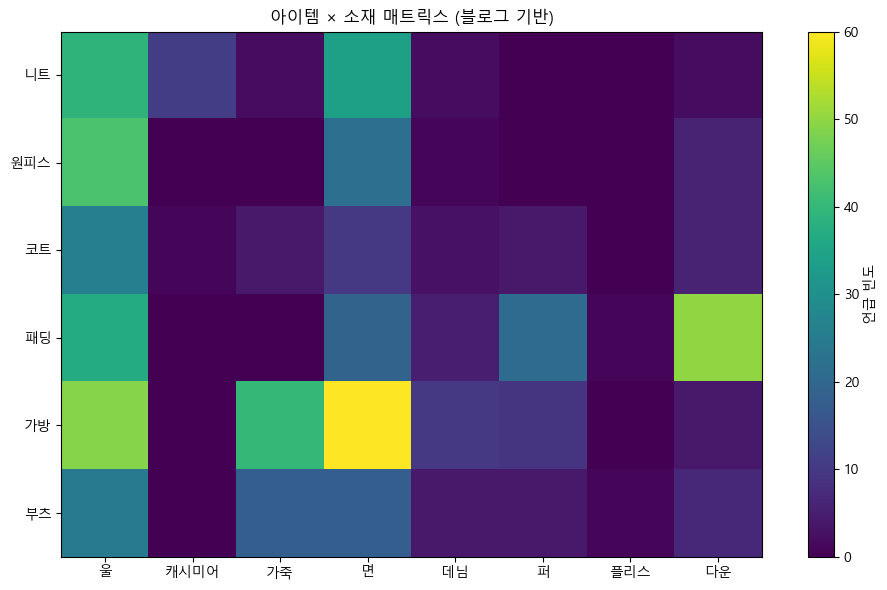

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(matrix_mat.values)

plt.xticks(range(len(TOP_MATERIALS)), TOP_MATERIALS)
plt.yticks(range(len(TOP_ITEMS)), TOP_ITEMS)

plt.colorbar(label="언급 빈도")
plt.title("아이템 × 소재 매트릭스 (블로그 기반)")

plt.tight_layout()
plt.show()
